<h2><font color="#004D7F" size=5>Módulo 3: Boosting</font></h2>


<h1><font color="#004D7F" size=6> 3. Extreme Gradient Boosting</font></h1>
<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Aprendizaje Automático II</font><br>
<font color="#004D7F" size=3>Universidad Nacional de Educación a Distancia</font>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>


* [1. Algoritmo XGBoost](#section1)
    * [1.1. Instalar XGBoost](#section11)
* [2. XGBoost según el tipo de problema](#section2)
    * [2.1. XGBoost para Clasificación](#section21)
    * [2.2. XGBoost para Regresión](#section22)
* [3. Hiperparámetros de XGBoost](#section3)
   * [3.1. Número de árboles](#section31)
   * [3.2. Profundidad del árbol](#section32)
   * [3.3. Tasa de aprendizaje](#section33)
   * [3.4. Tamaño de la muestra](#section34)
   * [3.5. Número de características](#section35)
* [Ejercicios](#sectionEj)

---

<a id="section0"></a>
# <font color="#004D7F">0. Contexto</font>

Extreme Gradient Boosting (XGBoost) es una biblioteca de código abierto que proporciona una implementación eficiente y efectiva del algoritmo. En este tutorial, trabajaremos:
- Extreme Gradient Boosting es una implementación eficiente de código abierto del algoritmo GBM.
- Cómo desarrollar conjuntos XGBoost para clasificación y regresión con la API scikit-learn.
- Cómo explorar el efecto de los hiperparámetros del modelo XGBoost en el rendimiento del modelo.


---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Algoritmo Extreme Gradient Boosting</font>

- Extreme Gradient Boosting (XGBoost) es una implementación eficiente de código abierto del algoritmo GBM.
- Fue desarrollado inicialmente por Tianqi Chen y descrito por Chen y Carlos Guestrin en su artículo de 2016 titulado _"XGBoost: A Scalable Tree Boosting System"_.
- Las dos razones principales para utilizar XGBoost son la velocidad de ejecución y el rendimiento del modelo.
  
<figure><center>
  <img src="data/xgboost.jpg" width="450" height="350" alt="Gráfica">
  <figcaption><blockquote>XGBoost. Extraída de <a href="http://dx.doi.org/10.1007/s42107-023-00651-z">Hybrid machine learning approach for construction cost estimation: an evaluation of extreme gradient boosting model</a></blockquote></figcaption>
</center></figure>


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Acceso al artículo científico [_XGBoost: A Scalable Tree Boosting System_](https://dl.acm.org/doi/abs/10.1145/2939672.2939785)
</div>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Acceso al artìculo de que demuestra empíricamente la alta eficiencia de XGBoost llamado [_Benchmarking Random Forest Implementations_](https://www.r-bloggers.com/2015/05/benchmarking-random-forest-implementations/)
</div>

<a id="section11"></a> 
## <font color="#004D7F"> 1.1. Instalar XGBoost</font>

El primer paso es instalar la biblioteca XGBoost.

In [1]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.3 MB/s eta 0:00:000m eta 0:00:010:01


Luego puede confirmar que la biblioteca XGBoost se instaló correctamente y se puede utilizar ejecutando el siguiente script.

In [2]:
import xgboost
print(xgboost.__version__)

1.6.2


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la librería [`XGBoost`](https://xgboost.readthedocs.io/en/stable/)
</div>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la librería [`XGBoost en Python`](https://xgboost.readthedocs.io/en/stable/python/index.html)
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section2"></a> 
# <font color="#004D7F"> 2. XGBoost según el tipo de problema</font>

La biblioteca XGBoost tiene su propia API personalizada, aunque usaremos el método a través de las clases contenedoras de scikit-learn: `XGBRegressor` y `XGBClassifier`. 

Al ajustar un modelo final, puede ser deseable aumentar el número de árboles hasta que la varianza del modelo se reduzca en evaluaciones repetidas, o ajustar múltiples modelos finales y promediar sus predicciones. 

<a id="section21"></a> 
## <font color="#004D7F"> 2.1. XGBoost para Clasificación</font>

En esta sección, veremos el uso de XGBoost para un problema de clasificación.

<a id="section211"></a> 
### <font color="#004D7F"> 2.1.1. Dataset</font>

Primero, podemos usar la función `make_classification()` para crear un problema de clasificación binaria sintética con 1000 ejemplos y 20 características de entrada.

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
print(X.shape, y.shape)

(1000, 20) (1000,)


<a id="section212"></a> 
### <font color="#004D7F"> 2.1.2. Evaluación</font>

Evaluaremos el modelo utilizando una validación cruzada estratificada repetida de _k_ veces, con 3 repeticiones y 10 veces. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`XGBClassifier`](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)
</div>

In [5]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.903 (0.026)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section22"></a> 
## <font color="#004D7F"> 2.2. XGBoost para Regresión</font>

En esta sección, veremos el uso de XGBoost para un problema de regresión. 

<a id="section221"></a> 
### <font color="#004D7F"> 2.2.1. Dataset</font>

Primero, podemos usar la función `make_regression()` para crear un problema de regresión sintética con 1000 ejemplos y 20 características de entrada.

In [6]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
print(X.shape, y.shape)

(1000, 20) (1000,)


<a id="section222"></a> 
### <font color="#004D7F"> 2.2.2. Evaluación</font>

Evaluaremos el modelo mediante validación cruzada estratificada repetida de _k_ veces, con 3 repeticiones y 10 pliegues. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`XGBRegressor`](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRegressor)
</div>

In [7]:
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

model = XGBRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -74.786 (5.355)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: La API de scikit-learn invierte el signo del MAE para transformarlo, de minimizar el error a maximizar el error negativo. Esto significa que los errores positivos de gran magnitud se convierten en grandes errores negativos (por ejemplo, 100 se convierte en -100) y un modelo perfecto no tiene ningún error con un valor de 0,0. También significa que podemos ignorar con seguridad el signo de las puntuaciones MAE medias. 

</div>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section3"></a> 
# <font color="#004D7F"> 3. Hiperparámetros de XGBoost</font>

En esta sección, analizaremos más de cerca algunos de los hiperparámetros que debería considerar ajustar para el conjunto XGBoost y su efecto en el rendimiento del modelo.

<a id="section31"></a> 
## <font color="#004D7F"> 3.1. Número de árboles</font>

- Los árboles de decisión se agregan al modelo secuencialmente en un esfuerzo por corregir y mejorar las predicciones hechas por árboles anteriores.
- Por eso, cuantos más árboles haya, mejor será.
- El número de árboles se establece con el argumento `n_estimators` (por defecto es 100). 

In [8]:
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [10]:
def get_models():
	models = dict()
	trees = [10, 50, 100, 500, 1000]
	for t in trees:
		models[str(t)] = XGBClassifier(n_estimators=t)
	return models

In [11]:
from matplotlib import pyplot

X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>10 0.885 (0.029)
>50 0.915 (0.029)
>100 0.925 (0.028)
>500 0.927 (0.028)
>1000 0.926 (0.028)


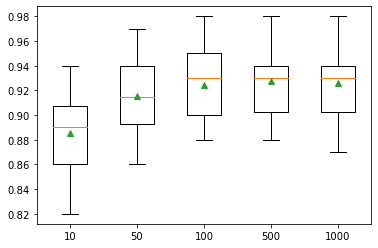

In [12]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section32"></a> 
## <font color="#004D7F"> 3.2. Profundidad del árbol</font>

- La profundidad del árbol controla qué tan especializado está cada árbol en train (qué tan general o sobreajustado).
- Se prefieren árboles que no sean demasiado superficiales y generales (como AdaBoost) ni demasiado profundos y especializados (como Bootstrap Aggregation).
- XGBoost generalmente funciona bien con árboles que tienen una profundidad modesta, encontrando un equilibrio entre habilidad y generalidad. 
- La profundidad del árbol se controla mediante el argumento `max_depth` (por defecto es 6).

In [13]:
def get_models():
	models = dict()
	# Explorar entre 1 y 10
	for i in range(1,11):
		models[str(i)] = XGBClassifier(max_depth=i)
	return models

In [14]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.849 (0.028)
>2 0.906 (0.032)
>3 0.926 (0.027)
>4 0.930 (0.027)
>5 0.924 (0.031)
>6 0.925 (0.028)
>7 0.926 (0.030)
>8 0.926 (0.029)
>9 0.921 (0.032)
>10 0.923 (0.035)


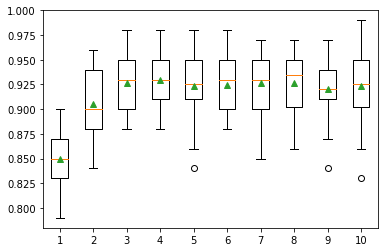

In [15]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section33"></a> 
## <font color="#004D7F"> 3.3. Tasa de aprendizaje</font>

- La tasa de aprendizaje controla la cantidad de contribución que cada modelo tiene en la predicción del conjunto.
- Tasas más pequeñas pueden requerir más árboles de decisión en el conjunto. 
- La tasa de aprendizaje se puede controlar mediante el argumento `eta` (por defecto es 0,3).

In [16]:
def get_models():
	models = dict()
	# explorar estas tasas de aprendizaje [0.0001, 0.001, 0.01, 0.1, 1.0]
	rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
	for r in rates:
		key = '%.4f' % r
		models[key] = XGBClassifier(learning_rate=r)
	return models

In [17]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.0001 0.804 (0.039)
>0.0010 0.814 (0.037)
>0.0100 0.867 (0.027)
>0.1000 0.923 (0.030)
>1.0000 0.913 (0.030)


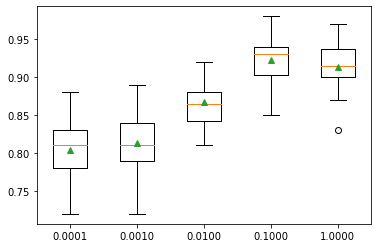

In [19]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section34"></a> 
## <font color="#004D7F"> 3.4. Tamaño de la muestra</font>

- Usar menos instancias introduce más varianza para cada árbol, aunque puede mejorar el rendimiento general del modelo. 
- Se especifica mediante el argumento `subsample` (por defecto es 1.0). 

In [20]:
from numpy import arange

def get_models():
	models = dict()
	# explorar de 10 a 100% en rangos de 10&
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = XGBClassifier(subsample=i)
	return models

In [21]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.1 0.876 (0.027)
>0.2 0.912 (0.033)
>0.3 0.917 (0.032)
>0.4 0.925 (0.026)
>0.5 0.928 (0.027)
>0.6 0.926 (0.024)
>0.7 0.925 (0.031)
>0.8 0.928 (0.028)
>0.9 0.928 (0.025)
>1.0 0.925 (0.028)


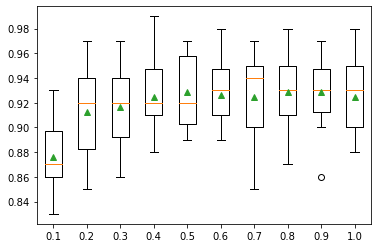

In [24]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section35"></a> 
## <font color="#004D7F"> 3.5. Número de características</font>

- La cantidad de características introduce una varianza adicional en el modelo, lo que puede mejorar el rendimiento, aunque podría requerir un aumento en la cantidad de árboles. 
- Se especifica mediante el argumento `colsample_bytree` (por defecto es 1,0). 

In [25]:
def get_models():
	models = dict()
	# explore ratio of features from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = XGBClassifier(colsample_bytree=i)
	return models

>0.1 0.841 (0.029)
>0.2 0.911 (0.029)
>0.3 0.920 (0.030)
>0.4 0.925 (0.029)
>0.5 0.926 (0.027)
>0.6 0.930 (0.025)
>0.7 0.929 (0.022)
>0.8 0.929 (0.026)
>0.9 0.929 (0.025)
>1.0 0.925 (0.028)


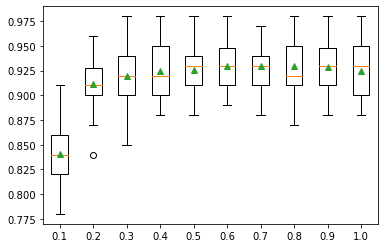

In [26]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---